# Collisions

In [1]:

import heapq
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [16]:
class AStar:
    def __init__(self):
        pass

    def search_path(self, start, goal, allowed_colors):
        # get collisions
        self.get_collision_layer(allowed_colors)
        collisions = np.loadtxt(f"{allowed_colors}.txt", dtype=int)
        
        open_set = []
        heapq.heappush(open_set, (0, start))
        came_from = {}
        g_score = {start: 0}
        f_score = {start: self.heuristic(start, goal)}
        while open_set:
            _, current = heapq.heappop(open_set)
            if current == goal:
                path = []
                while current in came_from:
                    path.append(current)
                    current = came_from[current]
                path.append(start)
                return path[::-1]

            for neighbor in self.get_neighbors(current, collisions):
                tentative_g_score = g_score[current] + 1
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + self.heuristic(neighbor, goal)
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))
        print("No path")
        return None

    @staticmethod
    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    @staticmethod
    def get_neighbors(node, collisions):
        height, width = collisions.shape
        y, x = node
        neighbors = []
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        for dy, dx in directions:
            ny, nx = y + dy, x + dx
            if 0 <= ny < height and 0 <= nx < width and collisions[ny, nx] == 0:
                neighbors.append((ny, nx))
        return neighbors
    
    @staticmethod
    def get_collision_layer(allowed_colors):
        colors = {
            "blue": (0, 0, 255),
            "black": (0, 0, 0),
            "grey": (128, 128, 128),
            "green": (41, 161, 39),
            "brown": (143, 110, 26),
            "red": (255, 0, 0),
            "red dark": (155, 0, 0)
        }
        allowed_colors_rgb = [colors[color] for color in allowed_colors]
        image = Image.open("/Users/youssefboulfiham/PycharmProjects/pythonProject/Youssef-Nieuwegein/graphics/enviroment_activity.png").convert("RGB")
        width, height = image.size
        pixels = image.load()
        collision_layer = np.zeros((height, width), dtype=int)
        for y in range(height):
            for x in range(width):
                if pixels[x, y] not in allowed_colors_rgb:
                    collision_layer[y, x] = 1  # Block the color
        np.savetxt(f"{allowed_colors}.txt", collision_layer, fmt='%d')

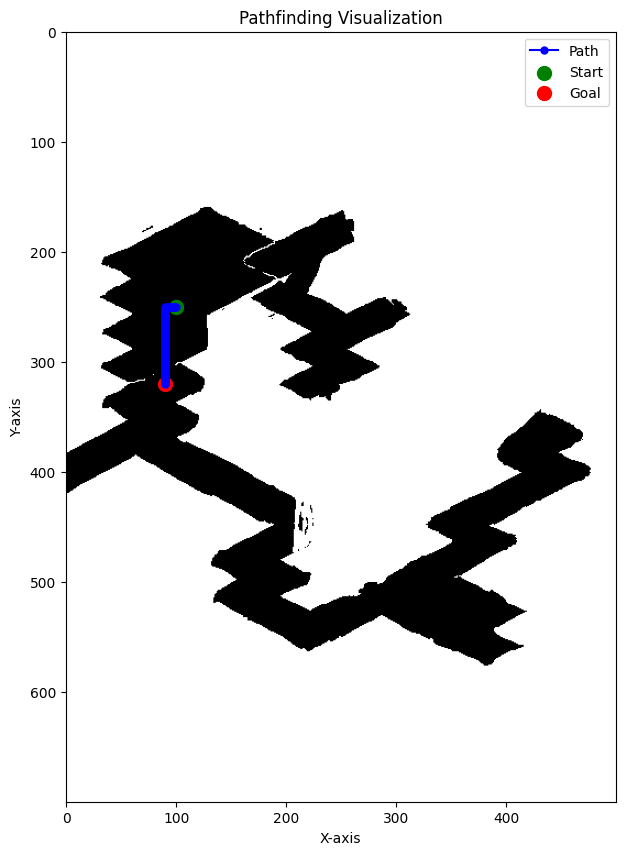

In [14]:
Pathfinding = AStar()
thuis = (250, 100)
weg_hart = (320, 90)
allowed_colors = ["black", "red"]
path = Pathfinding.search_path(start=thuis, goal=weg_hart, allowed_colors=allowed_colors)
Visualizer = Visualisations()
Visualizer.plot_path(f"{allowed_colors}.txt", path, thuis, weg_hart)

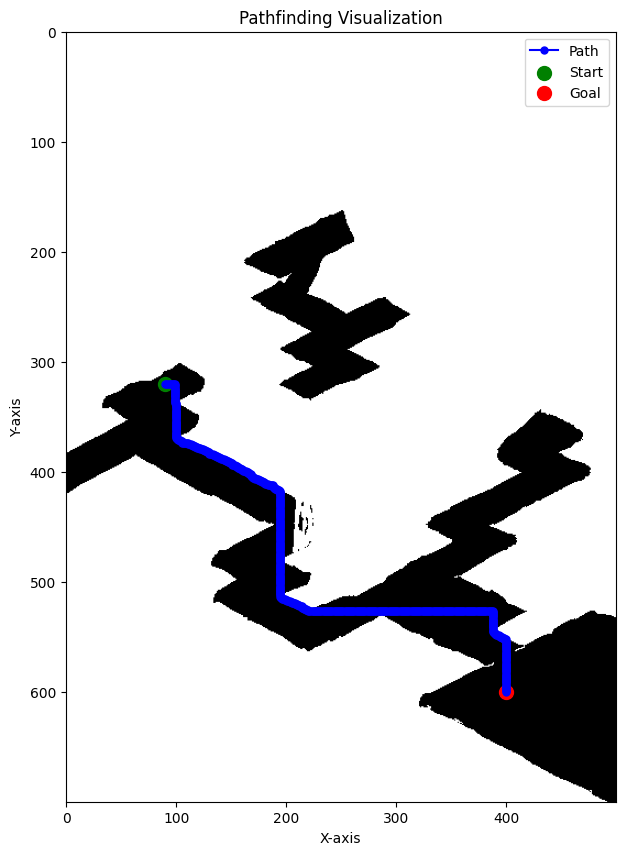

In [6]:
Pathfinding = AStar()
school = (600, 400)
allowed_colors = ["black", "blue"]
path = Pathfinding.search_path(start=weg_hart, goal=school, allowed_colors=allowed_colors)
Visualizer = Visualisations()
Visualizer.plot_path(f"{allowed_colors}.txt", path, weg_hart, school)

In [7]:
class Visualisations:
    def __init__(self):
        pass
        
    def plot(self, collision_layer):
        plt.figure(figsize=(10, 10))
        plt.imshow(collision_layer, cmap="gray", origin="upper")  
        plt.title("Collision Layer")
        plt.colorbar(label="Collision (1 = Blocked, 0 = Free)")
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.show()

    def plot_path(self, collision_layer_file, path, start, goal):
        collision_layer = np.loadtxt(collision_layer_file)
    
        plt.figure(figsize=(10, 10))
        plt.imshow(collision_layer, cmap="gray", origin="upper")  
    
        if path:
            path_y, path_x = zip(*path)
            plt.plot(path_x, path_y, marker="o", color="blue", markersize=5, linestyle="-", label="Path")
    
        plt.scatter(start[1], start[0], color="green", s=100, label="Start")  
        plt.scatter(goal[1], goal[0], color="red", s=100, label="Goal")  
    
        plt.legend()
        plt.title("Pathfinding Visualization")
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.show()


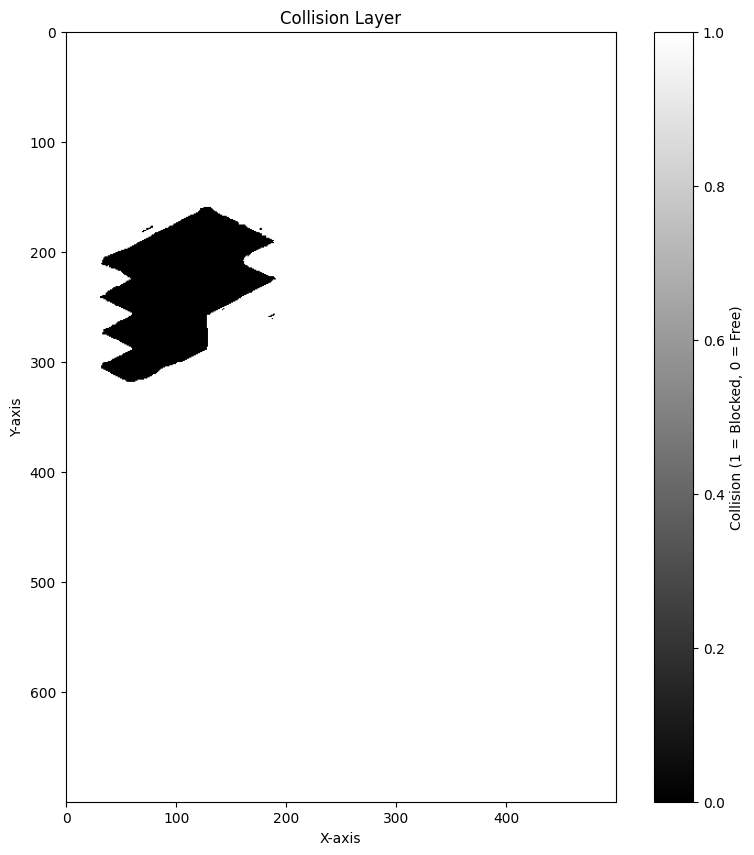

(700, 500)

In [8]:
Visualizer = Visualisations()
path = "['red'].txt"
# path = "['black', 'blue'].txt"
load = np.loadtxt(path, dtype=int)
Visualizer.plot(load)
load.shape


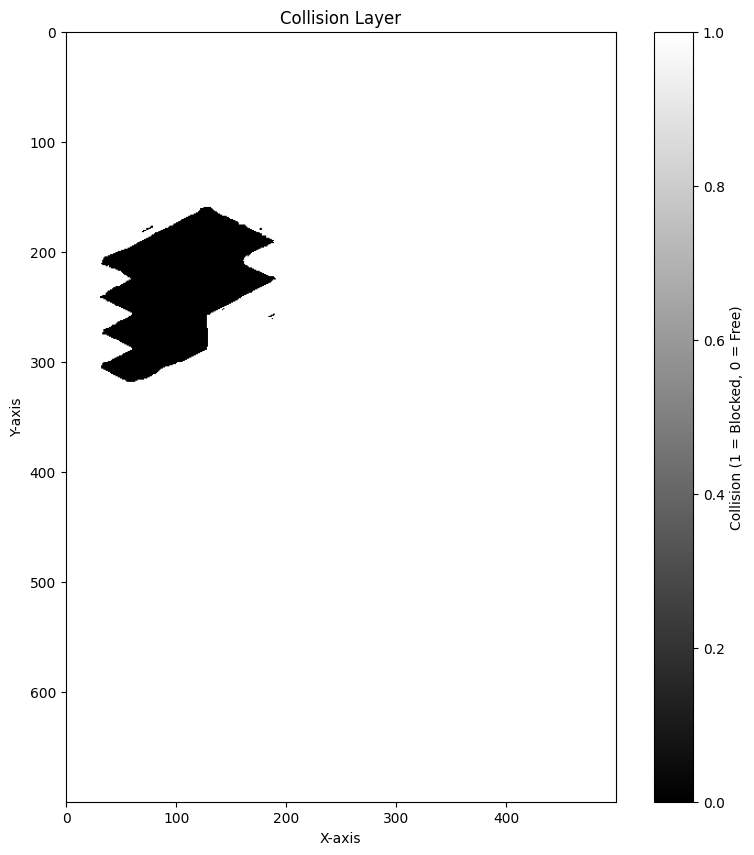

(700, 500)

In [10]:
Pathfinding = AStar()
Pathfinding.get_collision_layer(["red"])
Visualizer = Visualisations()
path = "['red'].txt"
# path = "['black', 'blue'].txt"
load = np.loadtxt(path, dtype=int)
Visualizer.plot(load)
load.shape

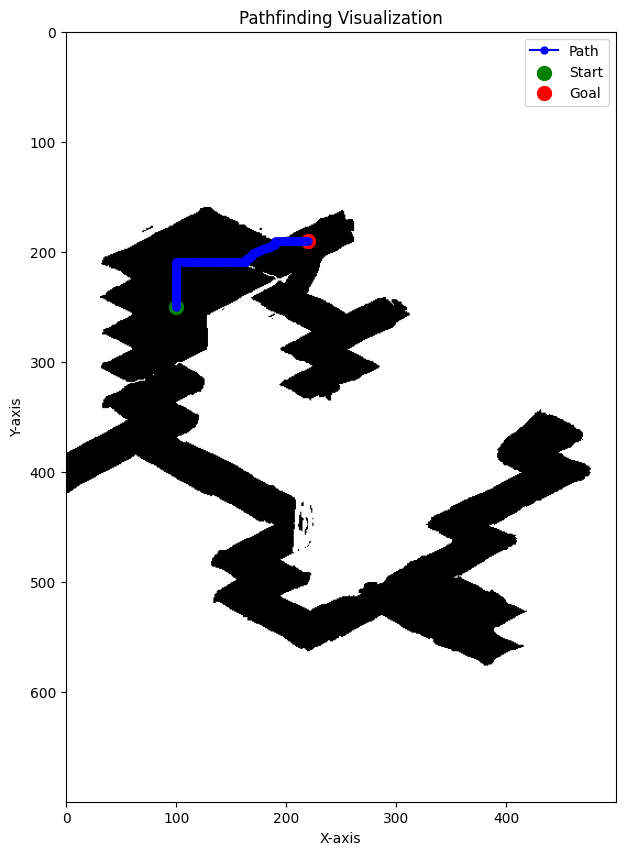

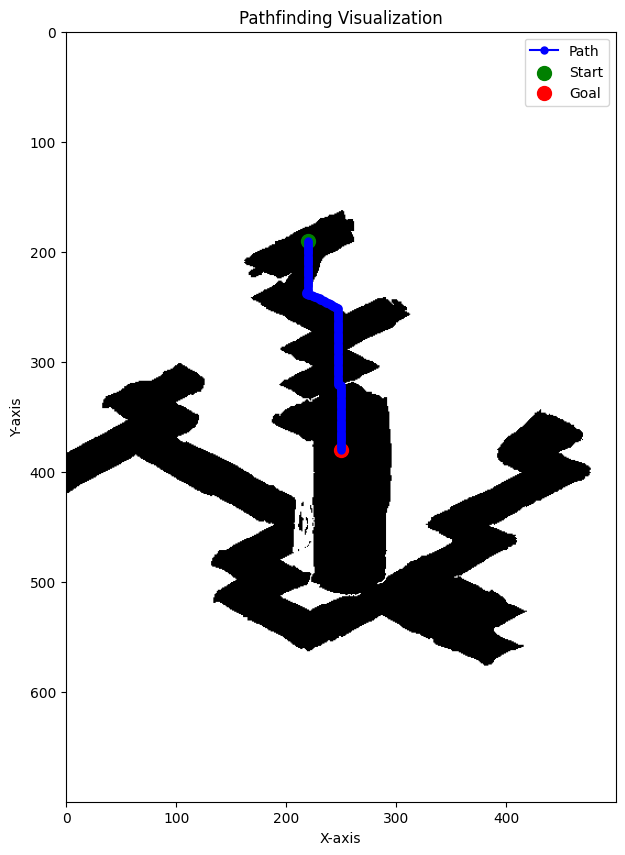

In [22]:
Pathfinding = AStar()
school = (600, 400)
thuis = (250, 100)
back_alley = (190, 220)
thuis_vriend = (380, 250)
allowed_colors = ["black", "red"]
path = Pathfinding.search_path(start=thuis, goal=back_alley, allowed_colors=allowed_colors)

Visualizer = Visualisations()
Visualizer.plot_path(f"{allowed_colors}.txt", path, thuis, back_alley)

allowed_colors = ["black", "red dark"]
path = Pathfinding.search_path(start=back_alley, goal=thuis_vriend, allowed_colors=allowed_colors)
Visualizer.plot_path(f"{allowed_colors}.txt", path, back_alley, thuis_vriend)
